<center><font size = "10"> Week 12 - Network Simulation III <center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: Group 5 
<br>Group member 1: Camil Hamdane
<br>Group member 2: Martim negalho Lisboa Simões
<br>Group member 3: Nathan Girard
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignments to be delivered by next Monday before 23:59.

# <font color= 'red'>Ex 1:</font>  Simple network simulation

<font size='3'> Using the modules `NetPyNe` modules `specs` and `sim`, create a simple network of soma neurons with 3 populations of 10 pyramidal cells each, using the standard compartmental Hodgkin-Huxley type cell (HH). Use the morphological, physiological, synaptic and stimulation parameters from tutorial 01 for all the populations. Connect one of the cell populations to the other two. For the first connection (population 1 to population 2) use the connection parameters (divergence, weight, delay, synMech) from tutorial 01. For the second connection (population 1 to population 3), modify and explore the connection parameters. 
    

<font size='3'>Run a simulation of 500 ms, internal integration time steps of 0.025 ms and record steps time of 0.1 ms. Plot the raster plot of all the cells and the 2D network representation of the cell locations and connections. 
    
    
<font size='3'>What do you observe regarding the firing rates of your populations? What differences in the activity do you observe?

<font size='3'><font color= 'red'>[2.5 pts]</font>


In [17]:
from netpyne import specs, sim

%matplotlib inline

In [18]:
# Definitions of network parameters
netParams = specs.NetParams()

# Define 3 populations of cells
netParams.popParams["pop_01"] = {"cellType": "PYR", "numCells": 10, "cellModel": "HH"}
netParams.popParams["pop_02"] = {"cellType": "PYR", "numCells": 10, "cellModel": "HH"}
netParams.popParams["pop_03"] = {"cellType": "PYR", "numCells": 10, "cellModel": "HH"}

In [19]:
## Cell property rules
cellRule = {"conds": {"cellType": "PYR"}, "secs": {}}  # cell rule dict
cellRule["secs"]["soma"] = {"geom": {}, "mechs": {}}  # soma params dict

# Soma geometry
cellRule["secs"]["soma"]["geom"] = {
    "diam": 18.8,
    "L": 18.8,
    "Ra": 123.0,
}  

# soma hh mechanism
cellRule["secs"]["soma"]["mechs"]["hh"] = {
    "gnabar": 0.12,
    "gkbar": 0.036,
    "gl": 0.003,
    "el": -70,
}  

# add dict to list of cell params
netParams.cellParams["PYRrule"] = cellRule  

## Synaptic mechanism parameters - excitatory synaptic mechanism
netParams.synMechParams["exc"] = {
    "mod": "Exp2Syn",
    "tau1": 0.1,
    "tau2": 5.0,
    "e": 0,
}  

# Stimulation parameters
netParams.stimSourceParams["bkg"] = {"type": "NetStim", "rate": 10, "noise": 0.5}
netParams.stimTargetParams["bkg->PYR"] = {
    "source": "bkg",
    "conds": {"cellType": "PYR"},
    "weight": 0.01,
    "delay": 5,
    "synMech": "exc",
}

In [20]:
## Cell connectivity rules - synaptic mechanism

# Connection population 1 to population 2
netParams.connParams["pop_01->pop_02"] = {  #  pop_01 -> pop_02 label
    "preConds": {"pop": "pop_01"},  # conditions of presyn cells
    "postConds": {"pop": "pop_02"},  # conditions of postsyn cells
    "divergence": 12,  # probability of connection
    "weight": 0.01,  # synaptic weight
    "delay": 5,  # transmission delay (ms)
    "synMech": "exc",
}  

netParams.connParams["pop_01->pop_03"] = {  #  pop_01 -> pop_03 label
    "preConds": {"pop": "pop_01"},  # conditions of presyn cells
    "postConds": {"pop": "pop_03"},  # conditions of postsyn cells
    "divergence": 5,  # probability of connection
    "weight": 0.5,  # synaptic weight
    "delay": 15,  # transmission delay (ms)
    "synMech": "exc",
}  

In [21]:
# Simulation options
simConfig = specs.SimConfig() # object of class SimConfig to store simulation configuration

# Simulation parameters
simConfig.duration = 5 * 1e2  # Duration of the simulation, in ms
simConfig.dt = 0.025  # Internal integration timestep to use
simConfig.verbose = False  # Show detailed messages
simConfig.recordTraces = {"V_soma": {"sec": "soma", "loc": 0.5, "var": "v"}}  # Dict with traces to record
simConfig.recordStep = 0.1  # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = "model_output_ex01"  # Set file output name
simConfig.savePickle = False  # Save params, network and sim output to pickle file
simConfig.saveJson = True

In [22]:
# Plots
simConfig.analysis["plotRaster"] = True  # Plot a raster
simConfig.analysis["plotRaster"] = {"saveFig": True}  # Plot a raster
simConfig.analysis["plotTraces"] = {"include": [1]} # Plot recorded traces for this list of cells
simConfig.analysis["plot2Dnet"] = True # plot 2D visualization of cell positions and connections


Start time:  2022-05-22 20:27:54.593115

Creating network of 3 cell populations on 1 hosts...
  Number of cells on node 0: 30 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 140 
  Done; cell connection time = 0.01 s.
Adding stims...
  Number of stims on node 0: 30 
  Done; cell stims creation time = 0.00 s.
Recording 1 traces of 1 types on node 0

Running simulation using NEURON for 500.0 ms...
  Done; run time = 0.20 s; real-time ratio: 2.52.

Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 30
  Connections: 170 (5.67 per cell)
  Spikes: 291 (19.40 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 0.20 s
Saving output as model_output_ex01_data.json ... 
Finished saving!
  Done; saving time = 0.03 s.
Preparing spike data...
Plotting raster...
Plotting recorded cell traces ... cell


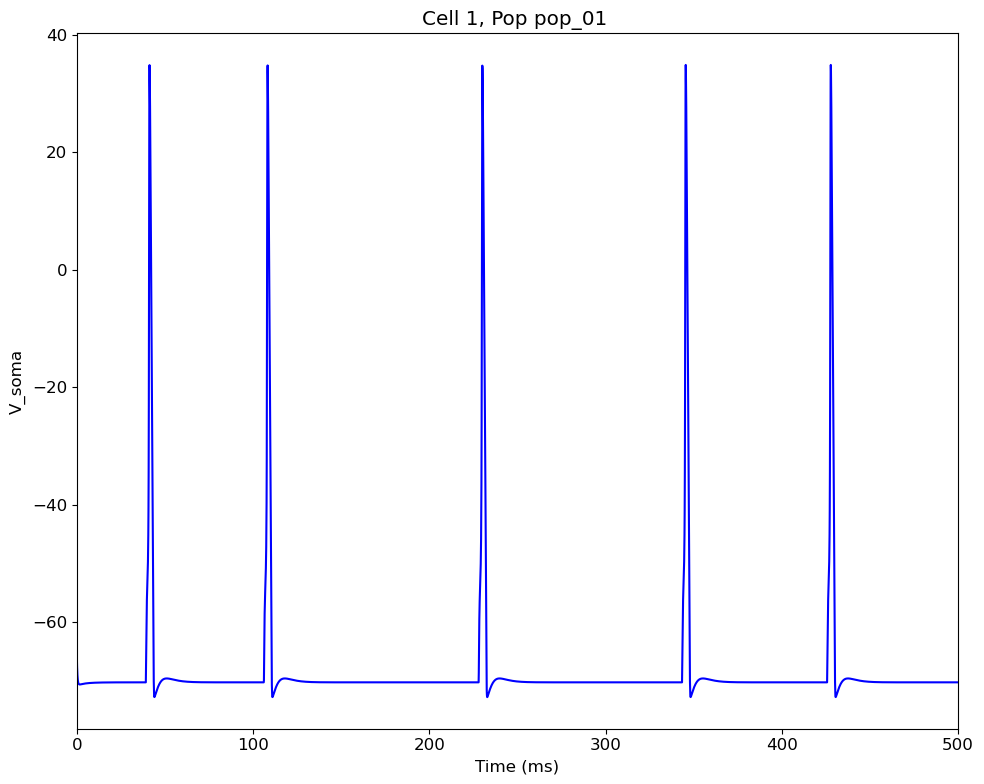

Plotting 2D representation of network cell locations and connections...


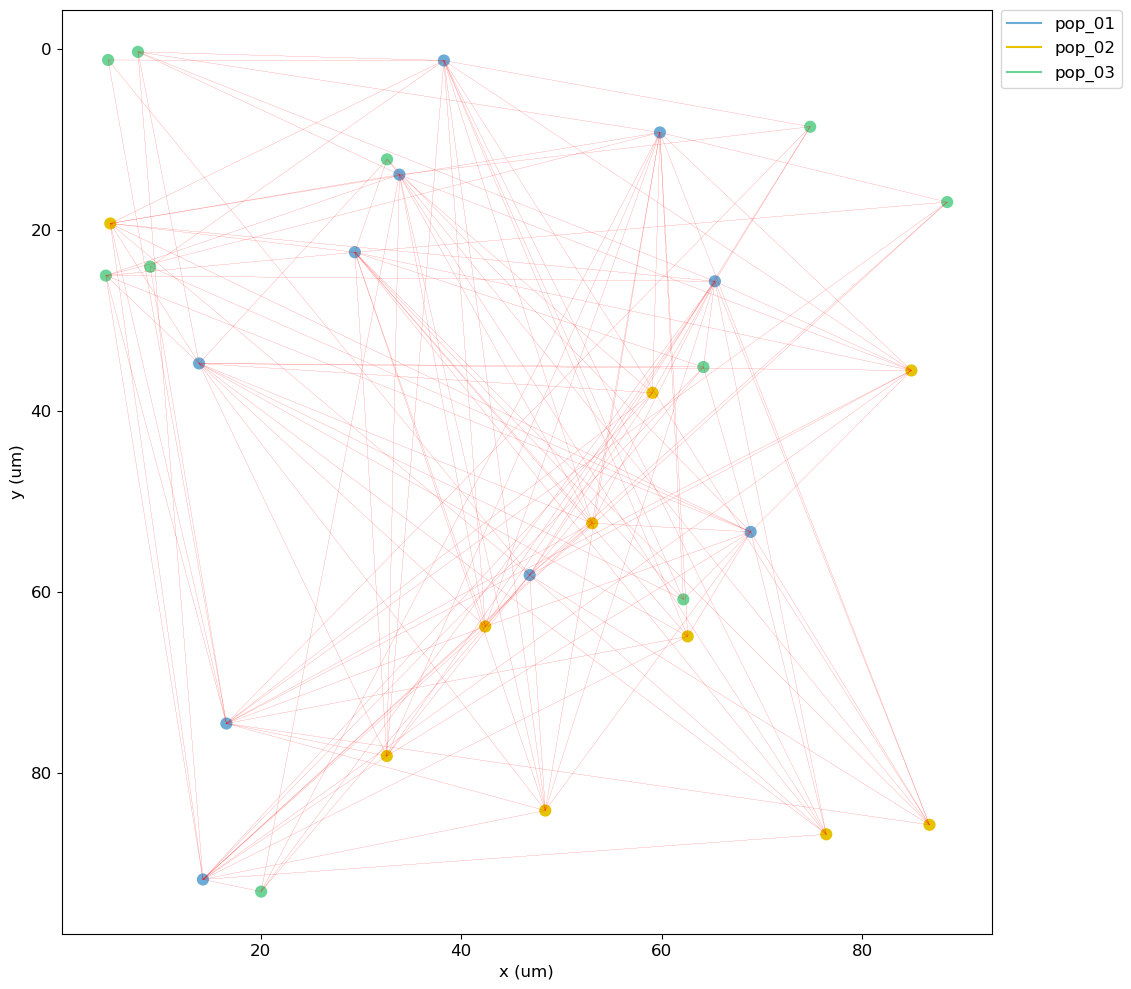

  Done; plotting time = 0.47 s

Total time = 0.73 s


In [23]:
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)

# <font color= 'red'>Ex 2: </font>Mouse cortical network simulation

<font size='3'>Following the line of tutorial 02, build a cortical-like network of dimensions: `x = 100 µm`, `y = 1210 µm` and `z = 100 µm`. Find the layer thickness for the mouse cortex in the paper __DeFelipe et al., 2002__ loaded in the moodle and assign these values to your model.

<font size='3'>Your network should have around 400 neurons in total. Cortical layer 1 is composed only by inhibitory cells and in the rest of the layers we can find both excitatory(E) and inhibitory(I) neurons. Extract the ratios of neurons for each layer and proportions of E/I balance from the second paper __Billeh et al. 2020.__
    
<font size='3'>Use the same morphological, physiological, synaptic and stimulation parameters from tutorial 02 for the excitatory and inhibitory cell populations. Connect the excitatory cells so they target cells within L2/3 to L6. Connect the inhibitory cells only to excitatory cells with a connection probability that decays exponentially as a function of distance `0.3*exp(-dist_3D/probLengthConst)`.
    
<font size='3'>Run a simulation of 1000 ms, internal integration time steps of 0.05 ms and record steps time of 1 ms. Plot the 2D network representation of the cell locations and connections and the connectivity matrix. 
    
<font size='3'>Based on what you learned in the lecture about the network regime map and in-silico experiments, what can you say about the activity of this cortical network? What type of activity does the network exhibit? What mechanisms have been associated with this activity, how could we attempt to change it?
    
<font size='3'><font color= 'red'>[3.5 pts]</font>

**Discuss :** From the paper of *DeFelipe et al.* and *Billeh et al.*, one can observe the following values for the layers thickness and their relative ratio of inhibitory and excitatory cells :

| Layer    | Thickness [µm] | E/I balance | E/I numbers | E/I numbers used |
| :------: | :------------: | :---------: | :---------: | :--------------: |
| I        | 69 ± 3.7       | 0:1         | 0:999       | 0:8              |
| II/III   | 235 ± 9.9      | 6:1         | 12689:2211  | 97:17            |
| IV       | 208 ± 4.6      | 6:1         | 10254:1786  | 79:14            |
| V        | 248 ± 6.1      | 6:1         | 7569:1285   | 58:10            |
| VI       | 451 ± 14.1     | 6:1         | 12882:2303  | 99:18            |
|          |                |             |             |                  |
| Total    |     **1210**   |             | **51978**   | **400**          |

In total, the cortex thickness is about **1210 µm** and a total of **51 978 neurons**.


In [25]:
# Network parameters
# object of class NetParams to store the network parameters
netParams_02 = specs.NetParams()

netParams_02.sizeX = 100  # x-dimension (horizontal length) size in um
netParams_02.sizeY = 1210  # y-dimension (vertical height or cortical depth) size in um
netParams_02.sizeZ = 100  # z-dimension (horizontal length) size in um
netParams_02.propVelocity = 100.0  # propagation velocity (um/ms)
netParams_02.probLengthConst = 150.0  # length constant for conn probability (um)

In [26]:
## Population parameters
# Layer I
netParams_02.popParams["I1"] = {
    "cellType": "I",
    "numCells": 8,
    "yRange": [0, 69],
    "cellModel": "HH",
}

# Layer II/III
netParams_02.popParams["E2/3"] = {
    "cellType": "E",
    "numCells": 97,
    "yRange": [70, 304],
    "cellModel": "HH",
}
netParams_02.popParams["I2/3"] = {
    "cellType": "I",
    "numCells": 17,
    "yRange": [70, 304],
    "cellModel": "HH",
}

# Layer IV
netParams_02.popParams["E4"] = {
    "cellType": "E",
    "numCells": 79,
    "yRange": [305, 512],
    "cellModel": "HH",
}
netParams_02.popParams["I4"] = {
    "cellType": "I",
    "numCells": 14,
    "yRange": [305, 512],
    "cellModel": "HH",
}

# Layer V
netParams_02.popParams["E5"] = {
    "cellType": "E",
    "numCells": 58,
    "yRange": [513, 760],
    # "ynormRange": [0.6, 1.0],
    "cellModel": "HH",
}
netParams_02.popParams["I5"] = {
    "cellType": "I",
    "numCells": 10,
    "yRange": [513, 760],
    # "ynormRange": [0.6, 1.0],
    "cellModel": "HH",
}

# Layer VI
netParams_02.popParams["E6"] = {
    "cellType": "E",
    "numCells": 99,
    "yRange": [761, 1210],
    # "ynormRange": [0.6, 1.0],
    "cellModel": "HH",
}
netParams_02.popParams["I6"] = {
    "cellType": "I",
    "numCells": 18,
    "yRange": [761, 1210],
    # "ynormRange": [0.6, 1.0],
    "cellModel": "HH",
}

In [27]:
## Cell property rules
cellRule = {"conds": {"cellType": "E"}, "secs": {}}  # cell rule dict
cellRule["secs"]["soma"] = {"geom": {}, "mechs": {}}  # soma params dict
cellRule["secs"]["soma"]["geom"] = {"diam": 15, "L": 14, "Ra": 120.0}  # soma geometry

# soma hh mechanism
cellRule["secs"]["soma"]["mechs"]["hh"] = {
    "gnabar": 0.13,
    "gkbar": 0.036,
    "gl": 0.003,
    "el": -70,
} 
netParams_02.cellParams["Erule"] = cellRule  # add dict to list of cell params

cellRule = {"conds": {"cellType": "I"}, "secs": {}}  # cell rule dict
cellRule["secs"]["soma"] = {"geom": {}, "mechs": {}}  # soma params dict
# soma geometry
cellRule["secs"]["soma"]["geom"] = {
    "diam": 10.0,
    "L": 9.0,
    "Ra": 110.0,
}  

# soma hh mechanism
cellRule["secs"]["soma"]["mechs"]["hh"] = {
    "gnabar": 0.11,
    "gkbar": 0.036,
    "gl": 0.003,
    "el": -70,
}  
netParams_02.cellParams["Irule"] = cellRule  # add dict to list of cell params

## Synaptic mechanism parameters
# NMDA synaptic mechanism
netParams_02.synMechParams["exc"] = {
    "mod": "Exp2Syn",
    "tau1": 0.8,
    "tau2": 5.3,
    "e": 0,
}

# GABA synaptic mechanism
netParams_02.synMechParams["inh"] = {
    "mod": "Exp2Syn",
    "tau1": 0.6,
    "tau2": 8.5,
    "e": -75,
} 

# Stimulation parameters
netParams_02.stimSourceParams["bkg"] = {"type": "NetStim", "rate": 20, "noise": 0.3}
netParams_02.stimTargetParams["bkg->all"] = {
    "source": "bkg",
    "conds": {"cellType": ["E", "I"]},
    "weight": 0.01,
    "delay": "max(1, normal(5,2))",
    "synMech": "exc",
}

In [28]:
# Connect excitatory cells to layers II/III - VI
netParams_02.connParams["E->all"] = {
    "preConds": {"cellType": "E"},
    "postConds": {"y": [70, 1210]},  #  E -> all (100-1000 um)
    "probability": 0.1,  # probability of connection
    "weight": "0.005*post_ynorm",  # synaptic weight
    "delay": "dist_3D/propVelocity",  # transmission delay (ms)
    "synMech": "exc",
}  # synaptic mechanism

# Connect inhibitory cells to excitatory cells
netParams_02.connParams["I->E"] = {
    "preConds": {"cellType": "I"},
    "postConds": {"pop": ["E2/3", "E4", "E5", "E6"]},  #  I -> E
    "probability": "0.3*exp(-dist_3D/probLengthConst)",  # probability of connection
    "weight": 0.001,  # synaptic weight
    "delay": "dist_3D/propVelocity",  # transmission delay (ms)
    "synMech": "inh",
}  # synaptic mechanism


Start time:  2022-05-22 20:47:40.122994

Creating network of 9 cell populations on 1 hosts...
  Number of cells on node 0: 400 
  Done; cell creation time = 0.04 s.
Making connections...
  Number of connections on node 0: 14436 
  Done; cell connection time = 1.67 s.
Adding stims...
  Number of stims on node 0: 400 
  Done; cell stims creation time = 0.04 s.
Recording 3 traces of 1 types on node 0

Running simulation using NEURON for 1000.0 ms...
  Done; run time = 8.52 s; real-time ratio: 0.12.

Gathering data...
  Done; gather time = 0.33 s.

Analyzing...
  Cells: 400
  Connections: 14836 (37.09 per cell)
  Spikes: 7107 (17.77 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 8.52 s
Preparing spike data...
Plotting raster...
Plotting recorded cell traces ... cell


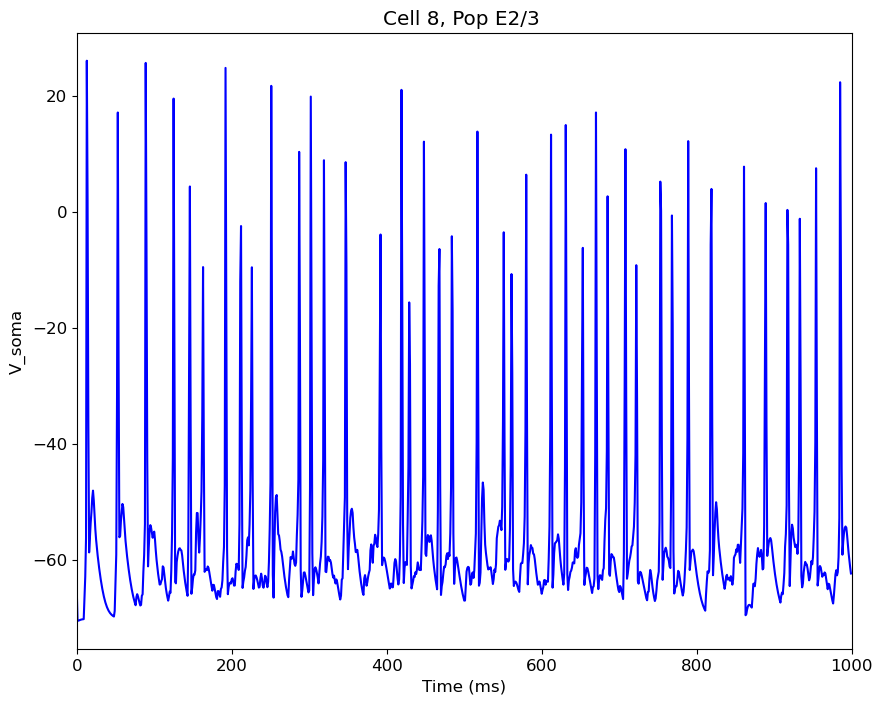

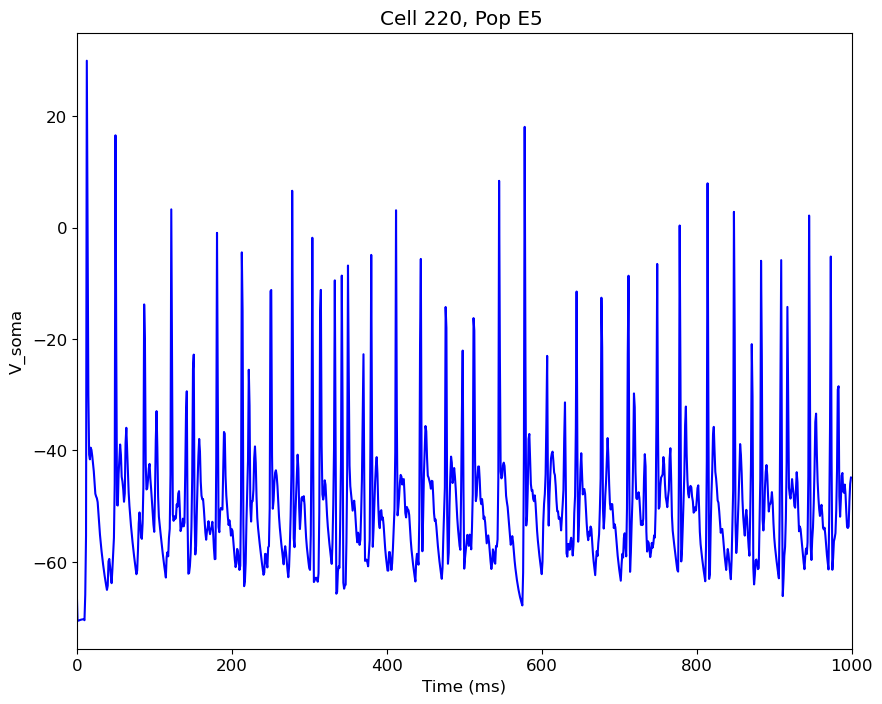

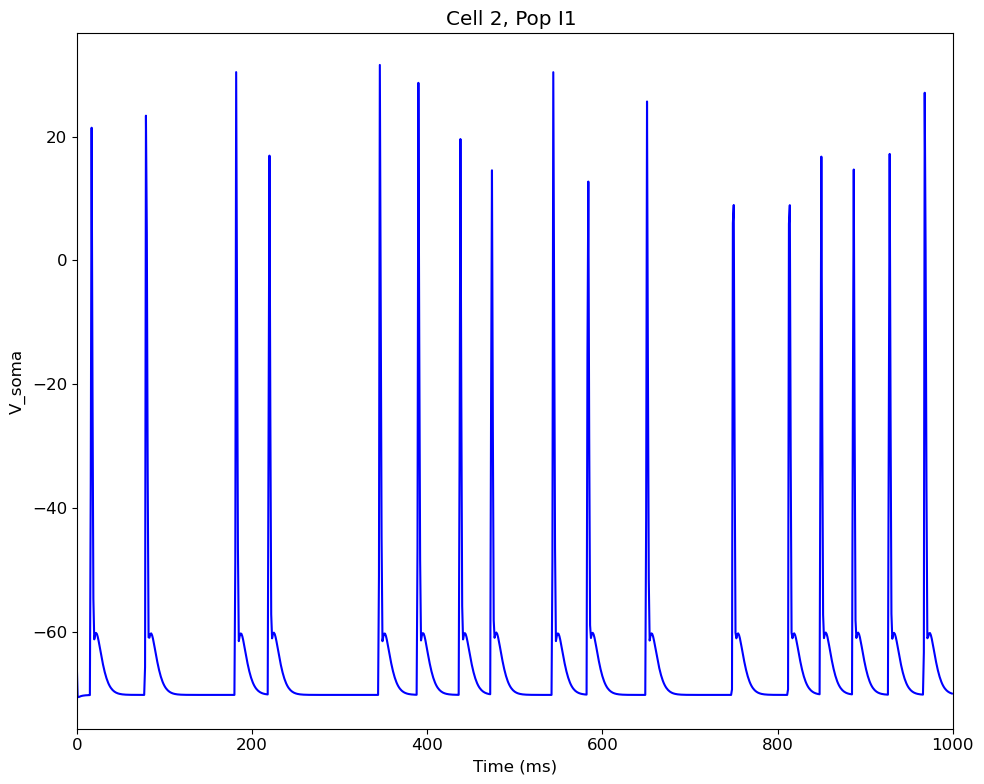

Plotting 2D representation of network cell locations and connections...


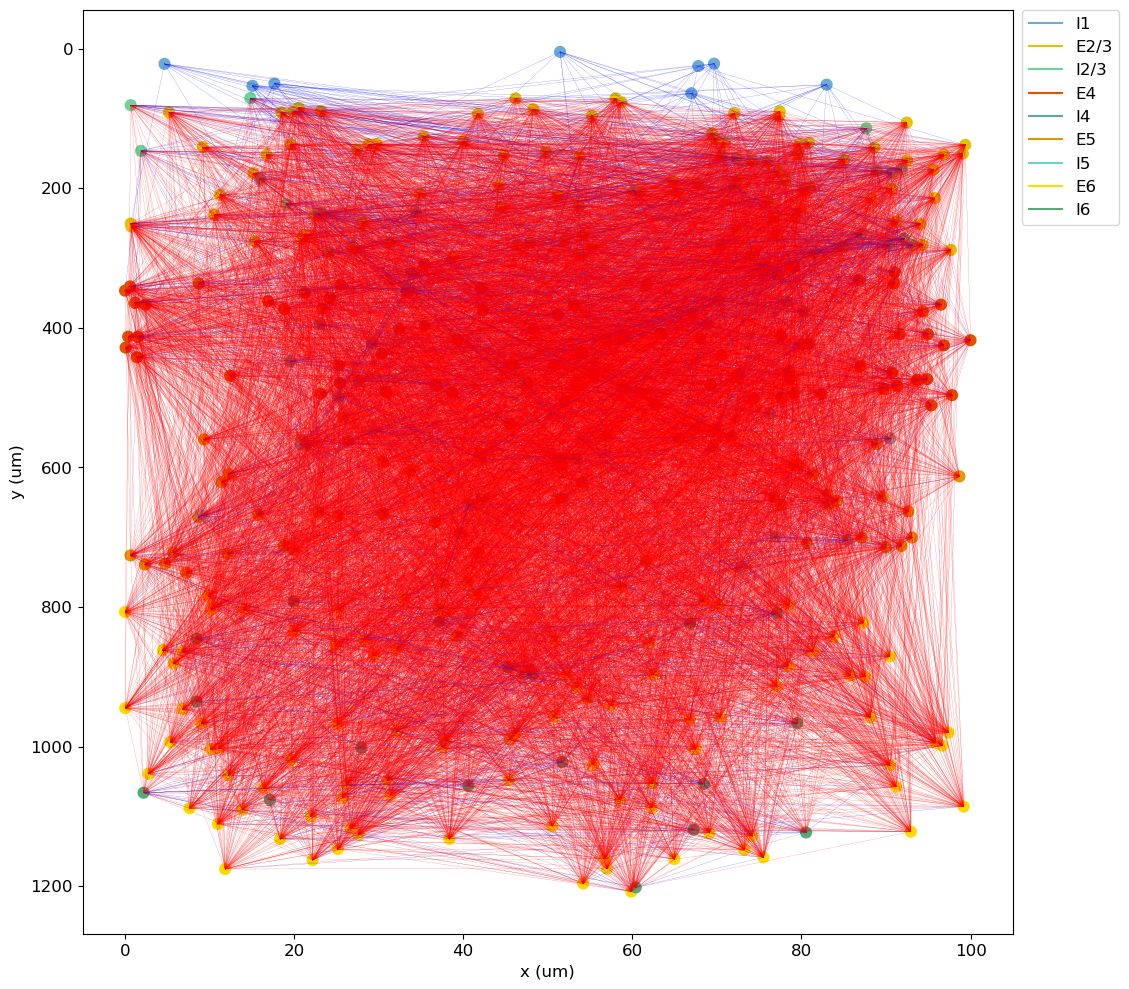

Plotting connectivity matrix...


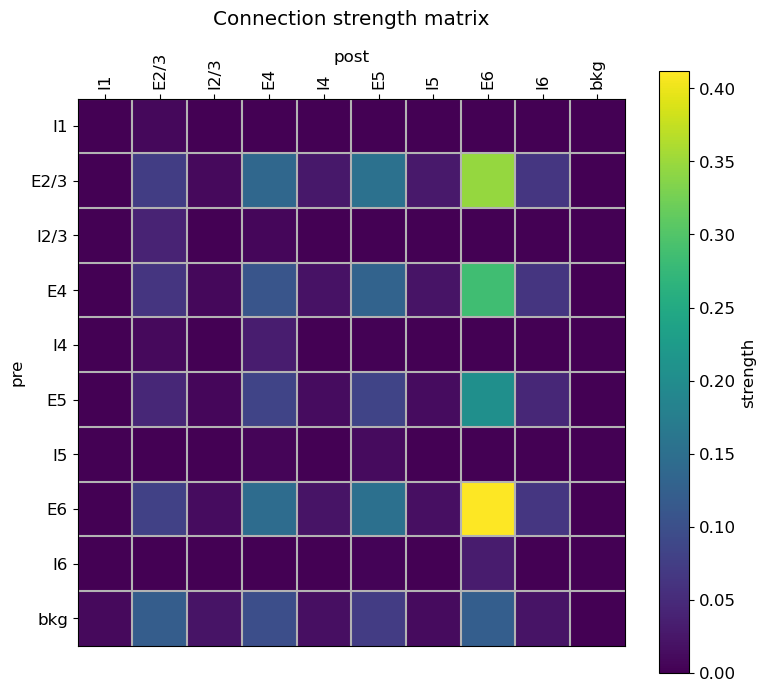

  Done; plotting time = 16.38 s

Total time = 27.01 s


In [30]:
# Simulation options
simConfig_02 = specs.SimConfig()

simConfig_02.duration = 1 * 1e3  # Duration of the simulation, in ms
simConfig_02.dt = 0.05  # Internal integration timestep to use
simConfig_02.verbose = False  # Show detailed messages
simConfig_02.recordTraces = {"V_soma": {"sec": "soma", "loc": 0.5, "var": "v"}}  # Dict with traces to record
simConfig_02.recordStep = 1  # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig_02.filename = "model_output_ex02"  # Set file output name
simConfig_02.savePickle = False  # Save params, network and sim output to pickle file

simConfig_02.analysis["plotRaster"] = {"orderBy": "y", "orderInverse": True,}  # Plot a raster
simConfig_02.analysis["plotTraces"] = {"include": [("E2/3", 0), ("E5", 5), ("I1", 2)]}  # Plot recorded traces for this list of cells
simConfig_02.analysis["plot2Dnet"] = True  # plot 2D visualization of cell positions and connections
simConfig_02.analysis["plotConn"] = True  # plot connectivity matrix

# Create network and run simulation
sim.createSimulateAnalyze(netParams=netParams_02, simConfig=simConfig_02)

# Optional Detailed cell morphology network

<font size='3'>Build a network with the set of morphologies assigned to your group in week 7. For each morphology you have to create a `.py` file with the morphological and biophysical characteristics for each cell. For this purpose you can use biophysics from tutorial 3 and created there files `Inh01.py` and  `Pyr01.py`

<font size='3'>Create 5 populations of cells with 5 cells each and the 3D compartmental Hodgkin-Huxley type cell (HH3D) taking care of the differences between pyramidal (E) and inhibitory cells (I). Connect the two inhibitory cell populations to the excitatory cell populations but not between them.
    
<font size='3'>Use the same synaptic and stimulation parameters used in tutorial 03. Add background stimulation to all of the neurons  with a firing rate of 100 Hz and noise level of 0.5 and connect it with a weight of 0.01 and a delay of 5 ms.  Run a simulation of 500 ms. Plot the raster plot, sample trace from each neuron populations, the 2D network representation of the cell locations and connections and the connectivity matrix.
    
<font size='3'>What can you observe? 
   